# Should 'y' be 2 dimensional in DataLoader()?

## Works OK with y.reshape(-1,1)

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [7]:
def dl(p, shuffle=False, reshape_y=True):
    def f(x):
        return [tensor(Image.open(o)) for o in (x).ls()]
    X3 = torch.stack(f(path/p/'3'))
    X7 = torch.stack(f(path/p/'7'))
    y = tensor([1]*len(X3) + [0]*len(X7))
    y = y.reshape(-1, 1) if reshape_y==True else y
    X = torch.cat([X3, X7]).view(-1, 28*28)/255.
    ds = list(zip(X, y))
    dl = DataLoader(ds, batch_size=256, shuffle=shuffle)
    return dl

def dls(shuffle=True, reshape_y=True):
    return DataLoaders(dl('train', shuffle=shuffle, reshape_y=reshape_y), dl('valid', reshape_y=reshape_y))

In [8]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.213742,0.085770,0.966634,00:00
1,0.102948,0.053242,0.969087,00:00
2,0.064131,0.044062,0.971050,00:00
3,0.047448,0.039272,0.971050,00:00
4,0.038335,0.036503,0.972522,00:00


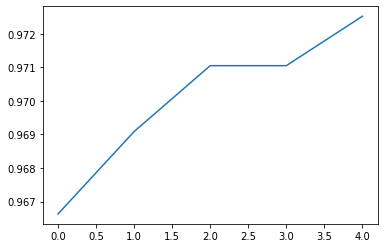

In [9]:
learn = Learner(dls(shuffle=True, reshape_y=True), simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(5, 0.1)

#plt.plot(L(learn.recorder.values).itemgot(0))
#plt.plot(L(learn.recorder.values).itemgot(1))
plt.plot(L(learn.recorder.values).itemgot(2))

## Doesn't work without y.reshape(-1,1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.498168,0.048625,0.959964,00:00
1,0.497918,0.048710,0.960454,00:00
2,0.498148,0.048844,0.959964,00:00
3,0.497676,0.049057,0.958982,00:00
4,0.497721,0.049326,0.958492,00:00
5,0.497653,0.049653,0.958001,00:00
6,0.498098,0.049928,0.958545,00:00
7,0.498131,0.050342,0.958108,00:00
8,0.497700,0.050720,0.957618,00:00


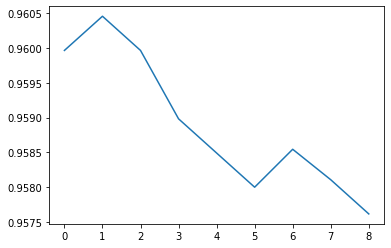

In [11]:
learn = Learner(dls(shuffle=True, reshape_y=False), simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(9, 0.1)

#plt.plot(L(learn.recorder.values).itemgot(0))
#plt.plot(L(learn.recorder.values).itemgot(1))
plt.plot(L(learn.recorder.values).itemgot(2))